In [ ]:
#C2054492

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
df = pd.read_csv("Coursework_1_data.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['VisitorType'] = labelencoder.fit_transform(df['VisitorType'])
df['Month'] = labelencoder.fit_transform(df['Month'])
df['Weekend'] = labelencoder.fit_transform(df["Weekend"])


In [ ]:
X_num = df.iloc[:,0:10]
X_cat = df.iloc[:,10:17]
y = df.Revenue

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from imblearn.pipeline import Pipeline, make_pipeline

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score

In [ ]:
# Convert categoric data

In [ ]:
categorical_features = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"]
X_categorical = df[categorical_features]



In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X_categorical = X_categorical.astype("object")
X_cat = pd.get_dummies(X_categorical)

In [ ]:
# Convert numeric data

In [ ]:
numerical_features = ["Administrative_Duration","Informational_Duration", "Administrative", "Informational", "ProductRelated",
                      "ProductRelated_Duration", "PageValues", "SpecialDay", "ExitRates", "BounceRates"]
X_numerical = df[numerical_features]

In [ ]:
minmaxscaler = MinMaxScaler()
X_num = minmaxscaler.fit_transform(X_numerical)
powertransformer = PowerTransformer(method='yeo-johnson', standardize=True)
X_num = powertransformer.fit_transform(X_num)
X_num = pd.DataFrame(X_num, columns= numerical_features)

In [ ]:
X = pd.concat([X_cat, X_num],1);X

,Month_0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_0,VisitorType_1,VisitorType_2,Weekend_0,Weekend_1,Administrative_Duration,Informational_Duration,Administrative,Informational,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,ExitRates,BounceRates
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.828078,-0.451248,-0.929892,-0.518576,-1.380546,-1.258022,-0.501956,-0.33602,1.946125,2.114178
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.828078,-0.451248,-0.929892,-0.518576,-1.291433,-1.124489,-0.501956,-0.33602,1.527868,-0.825872
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.828078,-0.451248,-0.929892,-0.518576,-1.380546,-1.258022,-0.501956,-0.33602,1.946125,2.114178
3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.828078,-0.451248,-0.929892,-0.518576,-1.291433,-1.252348,-0.501956,-0.33602,1.780913,1.693716
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.828078,-0.451248,-0.929892,-0.518576,-0.658864,-0.158439,-0.501956,-0.33602,0.737249,0.829038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.283028,-0.451248,0.755546,-0.518576,1.166075,1.006972,1.897477,-0.33602,0.023952,-0.054308
12326,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.828078,-0.451248,-0.929892,-0.518576,-1.038115,-0.400989,-0.501956,-0.33602,-0.347710,-0.825872
12327,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,-0.828078,-0.451248,-0.929892,-0.518576,-0.958132,-0.888016,-0.501956,-0.33602,1.390659,1.976611
12328,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.601600,-0.451248,1.042203,-0.518576,-0.327138,-0.597466,-0.501956,-0.33602,-0.362728,-0.825872


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
best_features = ['PageValues', 'ExitRates', 'ProductRelated_Duration',
       'ProductRelated', 'BounceRates', 'Administrative_Duration',
       'Administrative', 'Month_7', 'Informational_Duration',
       'Informational', 'Month_6']

In [ ]:
X = X[best_features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
X_train = X_train.values
X_test = X_test.values
y_train  = y_train.values
y_test  = y_test.values

In [ ]:
#smote = SMOTE()
#X_train, y_train = smote.fit_resample(X_train, y_train)
rus = RandomUnderSampler(sampling_strategy=0.6)
X_train, y_train = rus.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
parametreler = {'calibratedclassifiercv__base_estimator__n_neighbors': [10, 25, 50]}

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import classification_report

imbalance_pipeline = make_pipeline(CalibratedClassifierCV(KNeighborsClassifier()))

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) 

grid_imbalance = GridSearchCV(imbalance_pipeline, param_grid=parametreler, cv=cv, scoring='recall',
                        return_train_score=True)

grid_imbalance.fit(X_train, y_train)

y_pred = grid_imbalance.predict(X_test)

In [ ]:
print("*****KNN-UnderSampling-FeatureSelection****")
print("Validation Recall: {}".format(grid_imbalance.best_score_))

print("Recall Test: {}".format(recall_score(y_test, y_pred)))

print("Precision Test: {}".format(precision_score(y_test, y_pred)))

print("F2 Test: {}".format(fbeta_score(y_test, y_pred,2)))

print("F1 Test: {}".format(fbeta_score(y_test, y_pred,1)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

*****KNN-UnderSampling-FeatureSelection****
Validation Recall: 0.7714889277389279
Recall Test: 0.7987421383647799
Precision Test: 0.6018957345971564
F2 Test: 0.7497048406139315
F1 Test: 0.6864864864864866
[[2354  252]
 [  96  381]]
              precision    recall  f1-score   support

       False       0.96      0.90      0.93      2606
        True       0.60      0.80      0.69       477

    accuracy                           0.89      3083
   macro avg       0.78      0.85      0.81      3083
weighted avg       0.91      0.89      0.89      3083



In [ ]:
grid_imbalance.best_params_

{'calibratedclassifiercv__base_estimator__n_neighbors': 25}

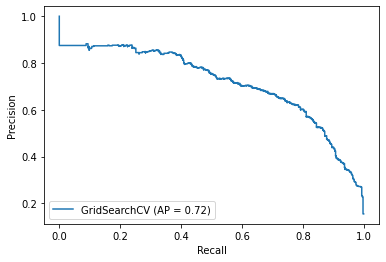

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(grid_imbalance ,X_test, y_test)

No Skill ROC AUC 0.483
KNN ROC AUC 0.927


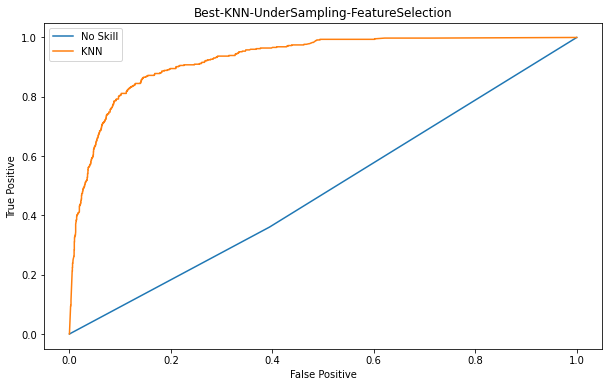

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(test_y, dummy_probs, model_probs):
    plt.figure(figsize=(10,6))
    
    falsep, truep, _ = roc_curve(test_y, dummy_probs)
    plt.plot(falsep, truep, label='No Skill')
    
    falsep, truep, _ = roc_curve(test_y, model_probs)
    plt.plot(falsep, truep, label='KNN')
    
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title("Best-KNN-UnderSampling-FeatureSelection")
    plt.legend()
    plt.show()

model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)
dummy_probs = y_pred_prob[:, 1]

roc_auc = roc_auc_score(y_test, dummy_probs)
print('No Skill ROC AUC %.3f' % roc_auc)

y_pred_prob = grid_imbalance.predict_proba(X_test)
modelprod = y_pred_prob[:, 1]

roc_auc = roc_auc_score(y_test, modelprod)
print('KNN ROC AUC %.3f' % roc_auc)

plot_roc_curve(y_test, dummy_probs, modelprod)